# CSV file and pandas profiling report
https://drive.google.com/drive/u/2/folders/1GnYRrbFdZB0WdQ8F8Ufkjj-1R0qafRRp

In [339]:
#pip install pandas_profiling


In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
%matplotlib inline
## Displays all the columns of a dataset.
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import LabelEncoder
from urllib.request import urlopen
from bs4 import BeautifulSoup 
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import datetime
import re



import warnings
warnings.filterwarnings("ignore")

# Web Scraping


In [341]:
'''
def get_item_info(url):
    list1 = []
   
        
    driver.get(url)
    soup_item = BeautifulSoup(driver.page_source, 'html.parser')
    
    try: 
        
        brand = soup_item.find(itemprop='brand').text
    except:
        brand ='na'
    
    
    try:
        model = soup_item.find(itemprop='model').text
    except:
        model ='na'
    
    try:
        date = soup_item.find(itemprop='vehicleModelDate').text
    except:
        date ='na'
    
    try:
        price = soup_item.find('span',itemprop='price').text
    except:
        price = 'na'
    
    try:
        color = soup_item.find(itemprop='color').text
    except:
        color = 'na'
    
    try:
        condition = soup_item.find(itemprop='itemCondition').text
    except:
        condition = 'na'
    
    try:
        bodytype = soup_item.find(itemprop='bodyType').text
    except:
        bodytype = 'na'
        
    try:
        wheelConfig = soup_item.find(itemprop='driveWheelConfiguration').text
    except:
        wheelConfig = 'na'
        
    try:
        transmission = soup_item.find(itemprop='vehicleTransmission').text
    except:
        transmission = 'na'
        
    try:
        fueltype = soup_item.find(itemprop='fuelType').text
    except:
        fueltype = 'na'
        
    try:
        mileage = soup_item.find(itemprop='mileageFromOdometer').text
    except:
        mileage = 'na'
    


    
    list1.append(brand)
    list1.append(model)
    list1.append(date)
    list1.append(price)
    list1.append(color)
    list1.append(condition)
    list1.append(bodytype)
    list1.append(wheelConfig)
    list1.append(transmission)
    list1.append(fueltype)
    list1.append(mileage)

   
    
    return list1

base_url = 'https://www.kijiji.ca'
itemlist= []
all_info_list=[]
driver = webdriver.Chrome()
for i in range(2,3):
    print('page_number : ',i)
    url = 'https://www.kijiji.ca/b-cars-vehicles/sarnia-area/page-{}/c27l1700189'.format(i)
    driver.get(url)
    time.sleep(5)
    bs = BeautifulSoup(driver.page_source, 'html.parser')
    elements=bs.find_all('a', href=re.compile('^(/v-cars-trucks/)((?!:).)*$'))
    for link in elements:
        if 'href' in link.attrs:
            item_url = base_url + link.attrs['href']
            if '?' not in item_url:
                itemlist = get_item_info(item_url)
                all_info_list.append(itemlist)
                time.sleep(2)
                itemlist = []
'''                    

"\ndef get_item_info(url):\n    list1 = []\n   \n        \n    driver.get(url)\n    soup_item = BeautifulSoup(driver.page_source, 'html.parser')\n    \n    try: \n        \n        brand = soup_item.find(itemprop='brand').text\n    except:\n        brand ='na'\n    \n    \n    try:\n        model = soup_item.find(itemprop='model').text\n    except:\n        model ='na'\n    \n    try:\n        date = soup_item.find(itemprop='vehicleModelDate').text\n    except:\n        date ='na'\n    \n    try:\n        price = soup_item.find('span',itemprop='price').text\n    except:\n        price = 'na'\n    \n    try:\n        color = soup_item.find(itemprop='color').text\n    except:\n        color = 'na'\n    \n    try:\n        condition = soup_item.find(itemprop='itemCondition').text\n    except:\n        condition = 'na'\n    \n    try:\n        bodytype = soup_item.find(itemprop='bodyType').text\n    except:\n        bodytype = 'na'\n        \n    try:\n        wheelConfig = soup_item.find(

In [342]:
# Loading Dataset
dataset = pd.read_csv('master_data.csv')
dataset.shape

(20319, 12)

In [343]:
# Profile Report
def profile_report(df,label):
    report = ProfileReport(df)
    if label == "raw":
        file_name="report_raw.html"
    else:
        file_name="report_clean.html"

    report.to_file(file_name)
profile_report(dataset, "raw")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [344]:
# Sample of data
dataset.sample(6)

,Unnamed: 0,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
12967,663,Toyota,Corolla,2022,"$26,098",Black,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,"8,220"
2740,1803,Nissan,Rogue,2015,"$14,950",Grey,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"179,631"
18213,1062,Scion,xD,2014,"$14,988",Silver,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,"119,000"
17425,274,Kia,Sportage,2020,"$28,449",Brown,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"76,180"
9556,887,Lincoln,Other,2019,"$41,500",White,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"54,322"
20118,800,BMW,4-Series,2018,"$43,995",Black,Used,Convertible,All-wheel drive (AWD),Automatic,Gasoline,"93,636"


In [345]:
# Dropping the unnamed column
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20319 entries, 0 to 20318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         20319 non-null  object
 1   model         20319 non-null  object
 2   date          20319 non-null  object
 3   price         20319 non-null  object
 4   color         20311 non-null  object
 5   condition     20319 non-null  object
 6   bodytype      20319 non-null  object
 7   wheel_config  20312 non-null  object
 8   transmission  20312 non-null  object
 9   fueltype      20312 non-null  object
 10  mileage       20240 non-null  object
dtypes: object(11)
memory usage: 1.7+ MB


# Data cleaning

Cleaning the data as there are commas and Dollar symbols in the data.

In [346]:
column_clean = ['price','mileage']
def data_cleaning():
    for i in column_clean:
        dataset[i]=dataset[i].replace('na',np.nan)
        dataset[i]=dataset[i].str.replace(',','')
        dataset[i]=dataset[i].str.replace('$','')
        dataset[i]=dataset[i].astype(float)
    dataset['date']=dataset.date.replace('na', np.nan).astype(float)
data_cleaning()


In [347]:
# Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20319 entries, 0 to 20318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         20319 non-null  object 
 1   model         20319 non-null  object 
 2   date          20095 non-null  float64
 3   price         19199 non-null  float64
 4   color         20311 non-null  object 
 5   condition     20319 non-null  object 
 6   bodytype      20319 non-null  object 
 7   wheel_config  20312 non-null  object 
 8   transmission  20312 non-null  object 
 9   fueltype      20312 non-null  object 
 10  mileage       17647 non-null  float64
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


In [348]:
# Numerical And Categorical Features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype !='O']
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features]
print('------------'*5)
print("Categorical Features", categorical_features)
print('------------'*5)
print("Numerical Features", numerical_features)

------------------------------------------------------------
Categorical Features ['brand', 'model', 'color', 'condition', 'bodytype', 'wheel_config', 'transmission', 'fueltype']
------------------------------------------------------------
Numerical Features ['date', 'price', 'mileage']


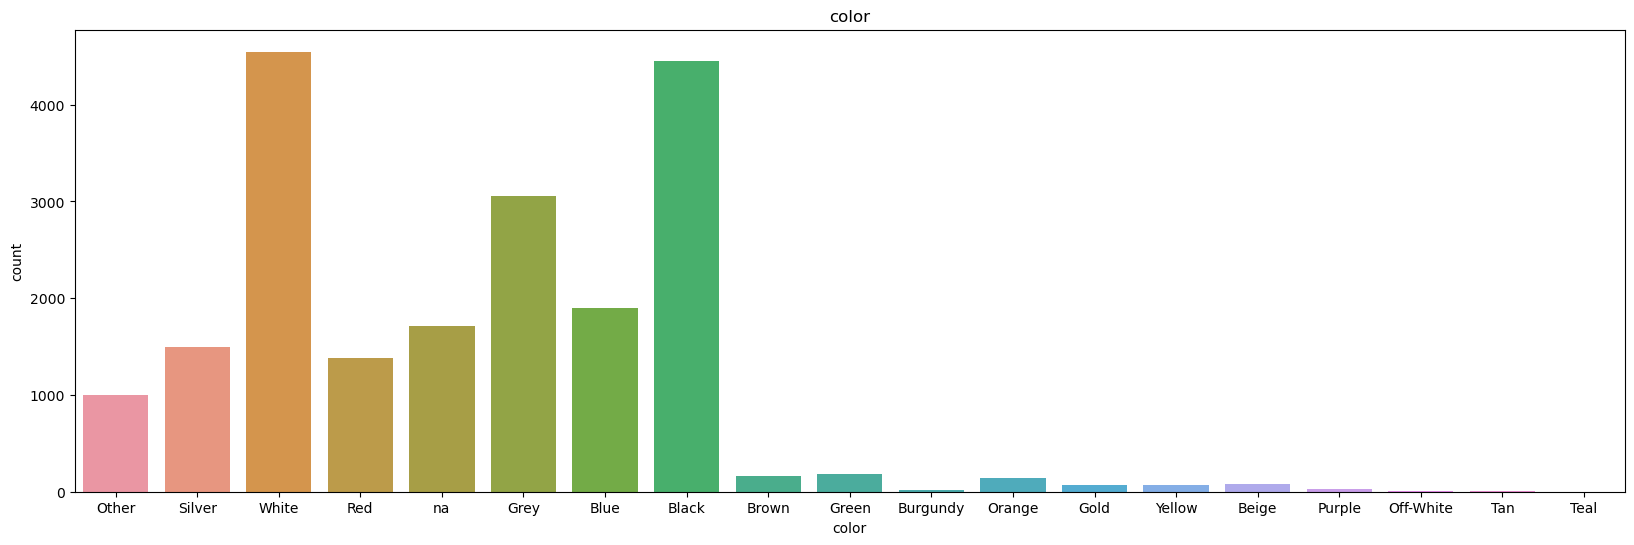

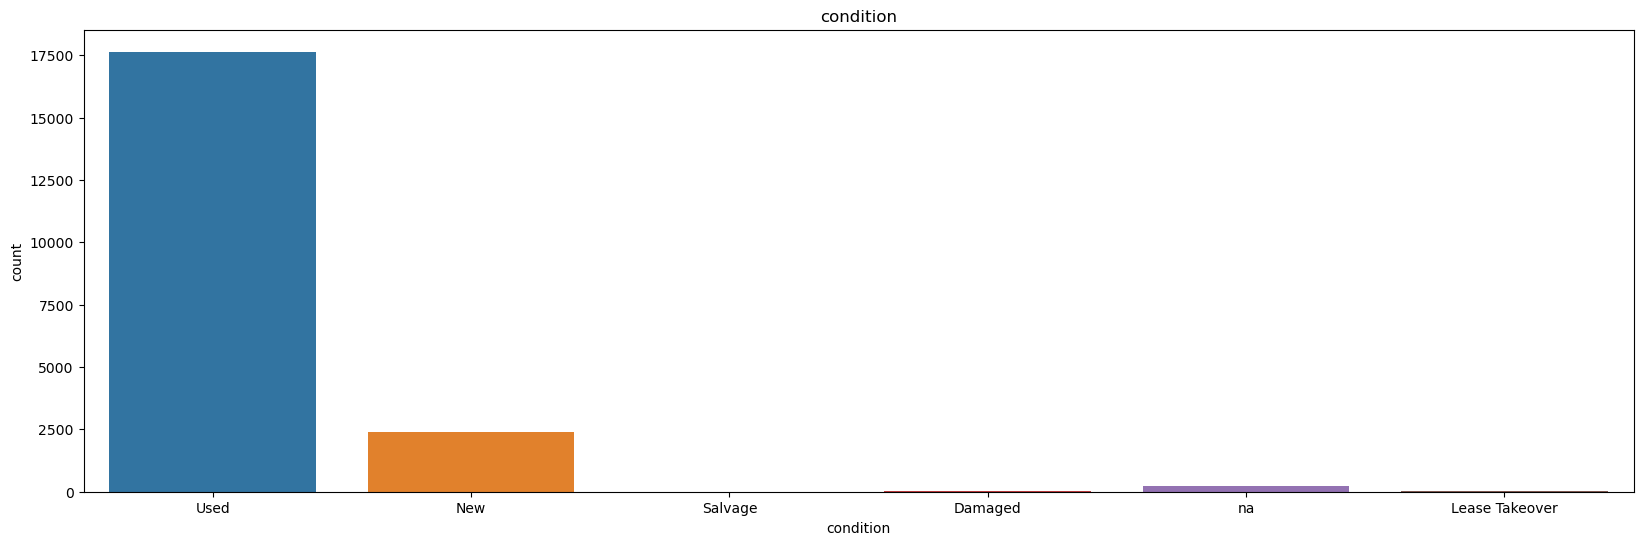

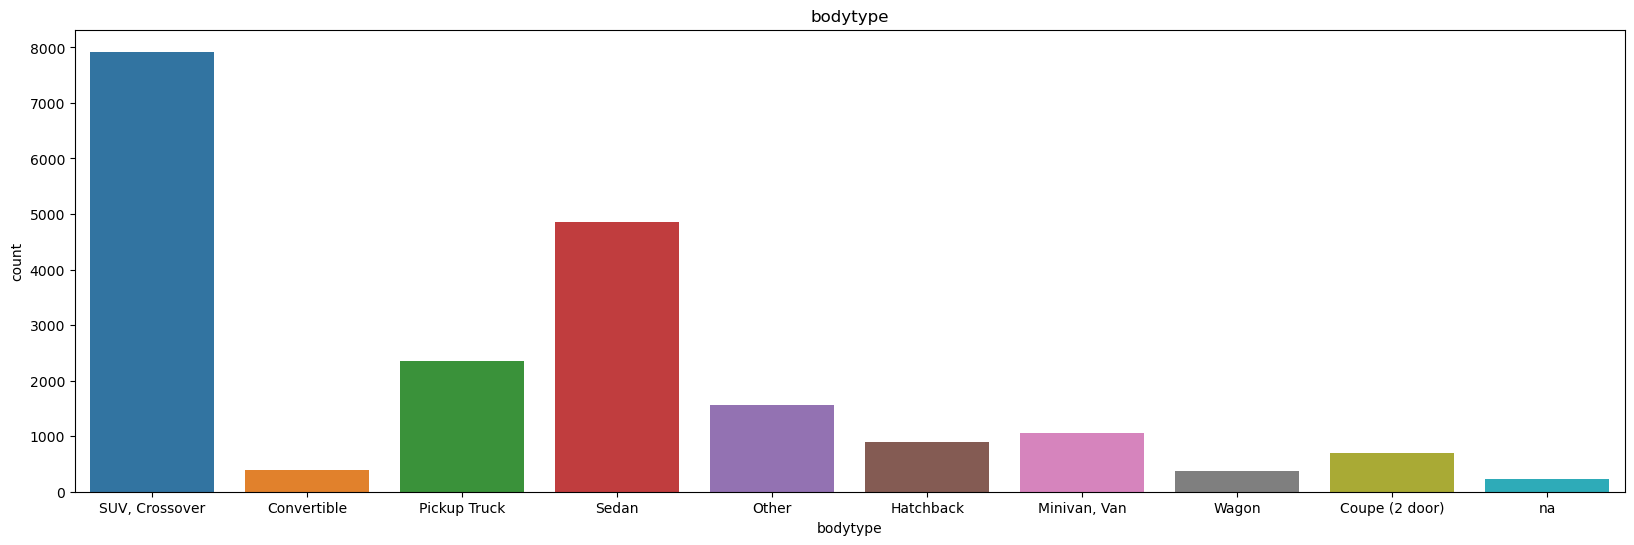

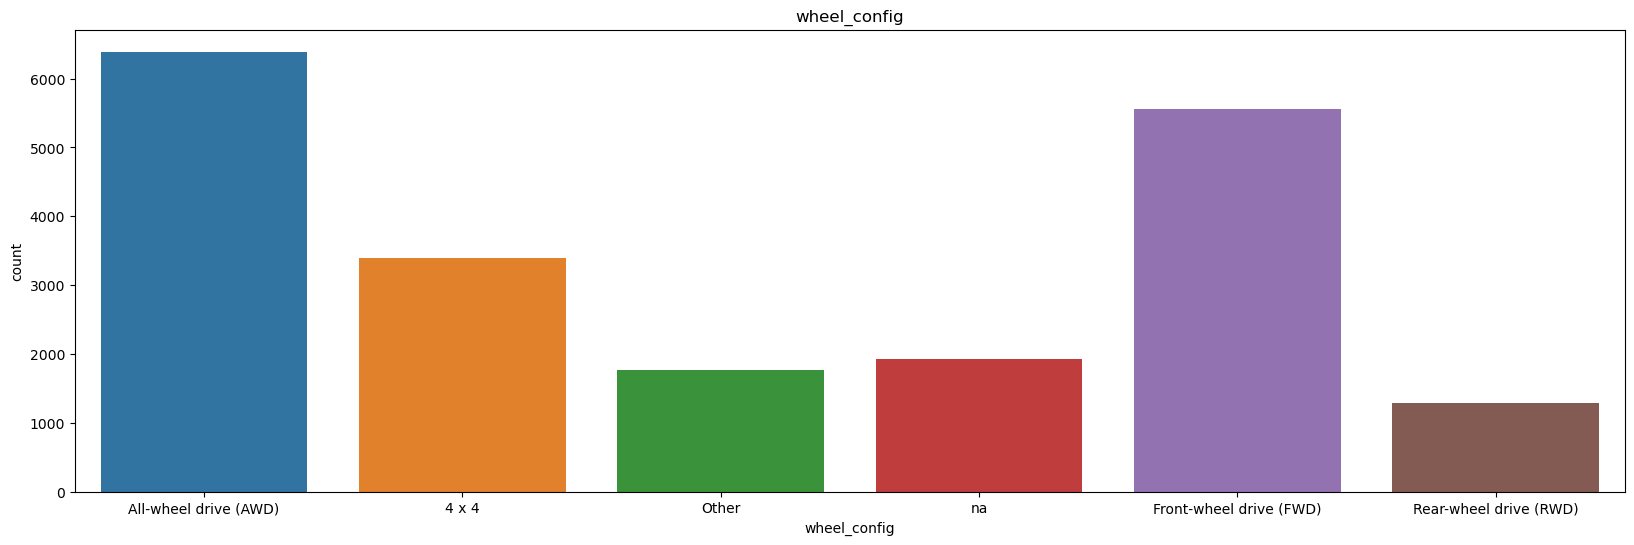

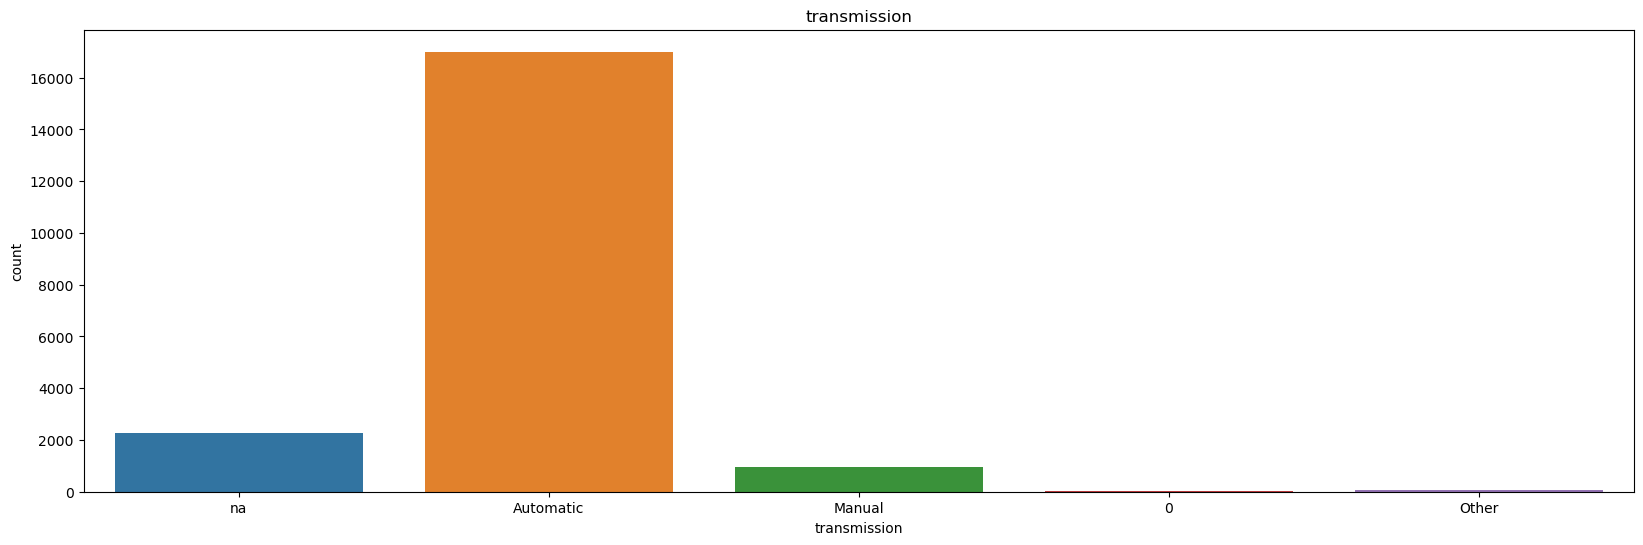

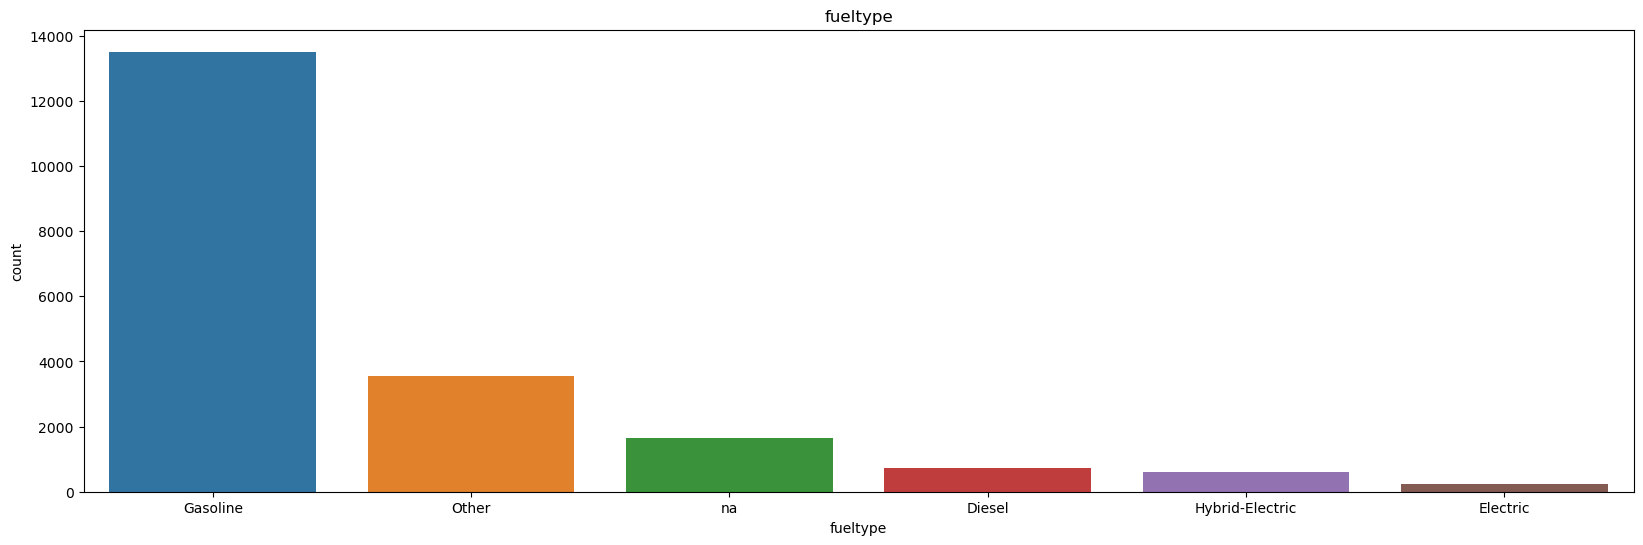

In [349]:
# Plot Unique value count of categrical features
for feature in categorical_features:
    features=['brand','model']
    if feature not in features:
        plt.figure(figsize=(20,6))
        sns.countplot(dataset[feature])
        plt.title(feature)
        plt.show()

# Checking Null Values

In [350]:
dataset.isna().sum()

brand              0
model              0
date             224
price           1120
color              8
condition          0
bodytype           0
wheel_config       7
transmission       7
fueltype           7
mileage         2672
dtype: int64

There are null values in date,price,mileage,color,transmission,wheel_config and fueltype features

# Removing Duplicate value from the data

In [351]:
print('Previous shape of dataset:',dataset.shape)
dataset.duplicated().sum()
dataset=dataset.drop_duplicates(keep='first')
print('After removing duplicates shape of dataset:',dataset.shape)


Previous shape of dataset: (20319, 11)
After removing duplicates shape of dataset: (15475, 11)


In [352]:
# Numerical feature value counts
for i in numerical_features:
    print("-------------------------------"*2)
    print(i)
    print(dataset[i].value_counts())

--------------------------------------------------------------
date
2019.0    1621
2023.0    1616
2020.0    1314
2018.0    1310
2022.0    1216
          ... 
1971.0       1
1955.0       1
1981.0       1
1938.0       1
1975.0       1
Name: date, Length: 66, dtype: int64
--------------------------------------------------------------
price
19995.0    90
27995.0    85
24995.0    81
5000.0     73
29995.0    72
           ..
14975.0     1
4498.0      1
73000.0     1
59990.0     1
51666.0     1
Name: price, Length: 5293, dtype: int64
--------------------------------------------------------------
mileage
200000.0    57
0.0         43
170000.0    42
160000.0    42
230000.0    41
            ..
24425.0      1
124778.0     1
23423.0      1
34741.0      1
200005.0     1
Name: mileage, Length: 9907, dtype: int64


In [353]:
# Categorical feature value counts

for i in categorical_features:
    print(i)
    print(dataset[i].value_counts())
    print("-------------------------------"*2)

brand
Ford          2081
Chevrolet     1214
Honda         1123
Toyota        1065
Hyundai        988
              ... 
Oldsmobile       1
Bugatti          1
AM General       1
MG               1
Alfa Romeo       1
Name: brand, Length: 61, dtype: int64
--------------------------------------------------------------
model
Other                      918
F-150                      565
1500                       471
Civic                      401
RAV4                       291
                          ... 
Nova                         1
Silver Spirit/Spur/Dawn      1
Vantage                      1
xB                           1
H1                           1
Name: model, Length: 590, dtype: int64
--------------------------------------------------------------
color
White        3455
Black        3357
Grey         2319
Blue         1424
na           1345
Silver       1192
Red          1049
Other         708
Green         154
Brown         134
Orange        100
Beige          64
Gold         

# Missing Values

In [354]:
dataset.isna().sum()

brand              0
model              0
date               6
price            703
color              8
condition          0
bodytype           0
wheel_config       7
transmission       7
fueltype           7
mileage         1904
dtype: int64

In [355]:
# Imputation of missing values of categrical feature
def missing_values_imputation_categorical(data,column):
    
    dataset[column] = np.where(dataset[column]== 'na','Other',dataset[column])
    dataset[column] = np.where(dataset[column]== '0','Manual',dataset[column])
    dataset[column] =dataset[column].fillna('Other')
for feature in categorical_features:
    missing_values_imputation_categorical(dataset,feature)


In [356]:
num_data_missing = [feature for feature in numerical_features if dataset[feature].isna().sum()>1]
num_data_missing

['date', 'price', 'mileage']

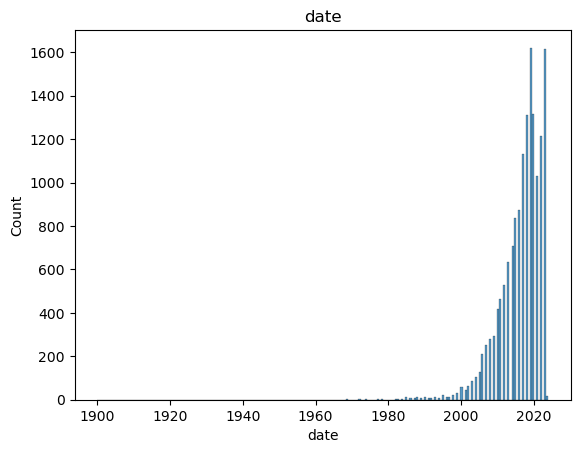

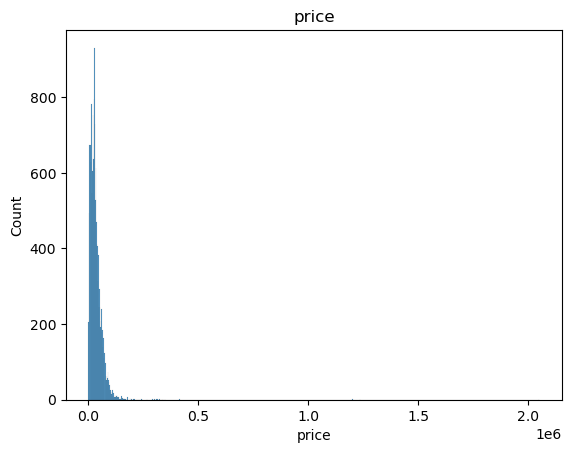

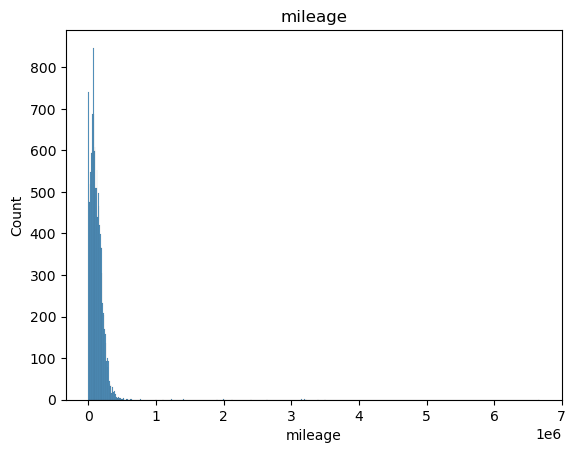

In [357]:
for column in num_data_missing:
    sns.histplot(dataset[column])
    plt.title(column)
    plt.show()

As we can see from the above graphs, the data is highly skewed and hence we cannot impute values with the mean and hence imputing missing data with median


In [358]:
# Imputation of missing values of Numerica feature

def missing_values_imputation_numerical(data,column):
    median_value= dataset[column].median()
    dataset[column].fillna(median_value,inplace=True)
    
for feature in num_data_missing:
    missing_values_imputation_numerical(dataset,feature)
dataset.isna().sum()

brand           0
model           0
date            0
price           0
color           0
condition       0
bodytype        0
wheel_config    0
transmission    0
fueltype        0
mileage         0
dtype: int64

In [359]:
num_data= dataset[numerical_features]
cat_data = dataset[categorical_features]

In [360]:
# Pandas Profiling on clean 
from pandas_profiling import ProfileReport

profile_report(dataset, "clean")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis

<AxesSubplot:xlabel='transmission', ylabel='count'>

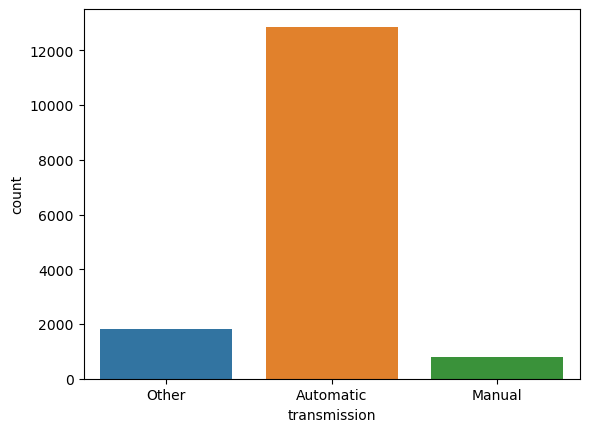

In [361]:
sns.countplot(x='transmission',data= cat_data)

<AxesSubplot:xlabel='color', ylabel='count'>

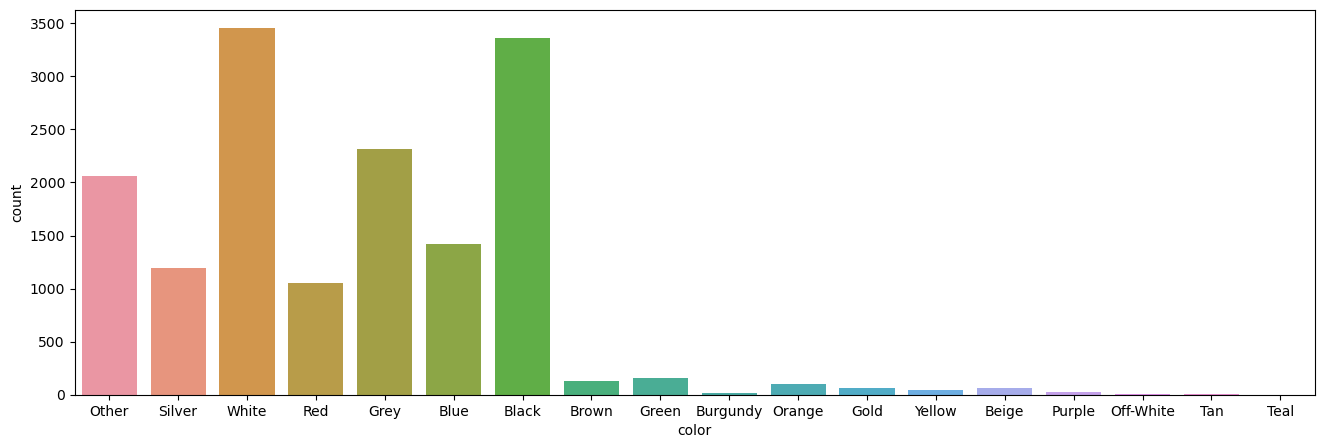

In [362]:
fig, ax = plt.subplots(figsize=(16,5))
sns.countplot(x='color',data= cat_data,ax=ax)

<AxesSubplot:xlabel='fueltype', ylabel='count'>

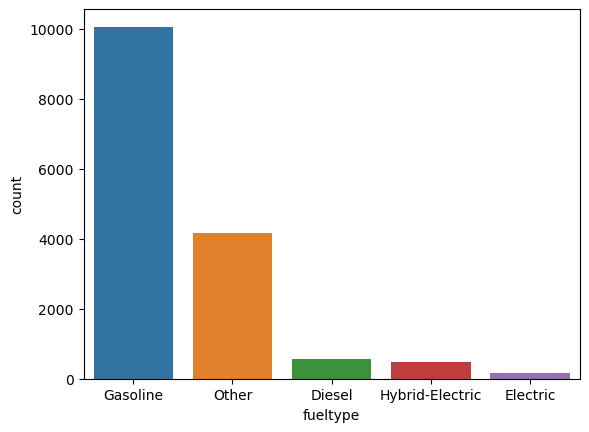

In [363]:
sns.countplot(x='fueltype',data= cat_data)

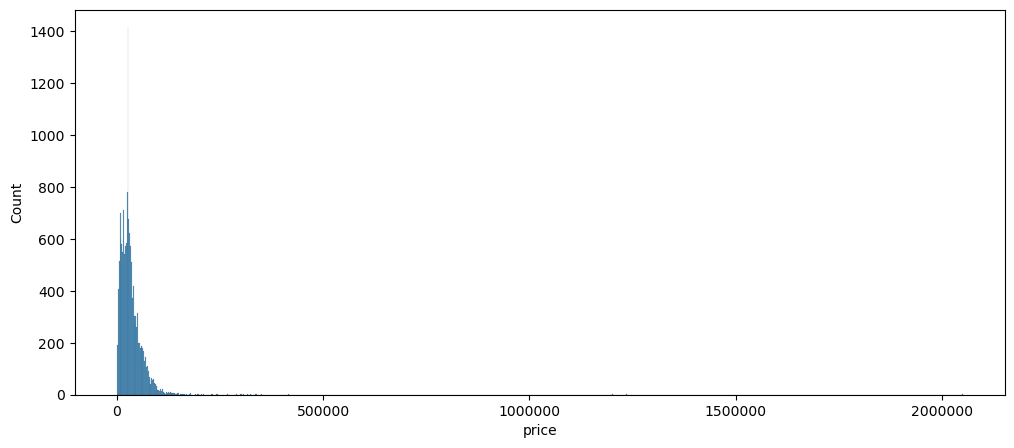

In [364]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(num_data['price'],ax=ax)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)


<AxesSubplot:title={'center':'price'}, xlabel='condition'>

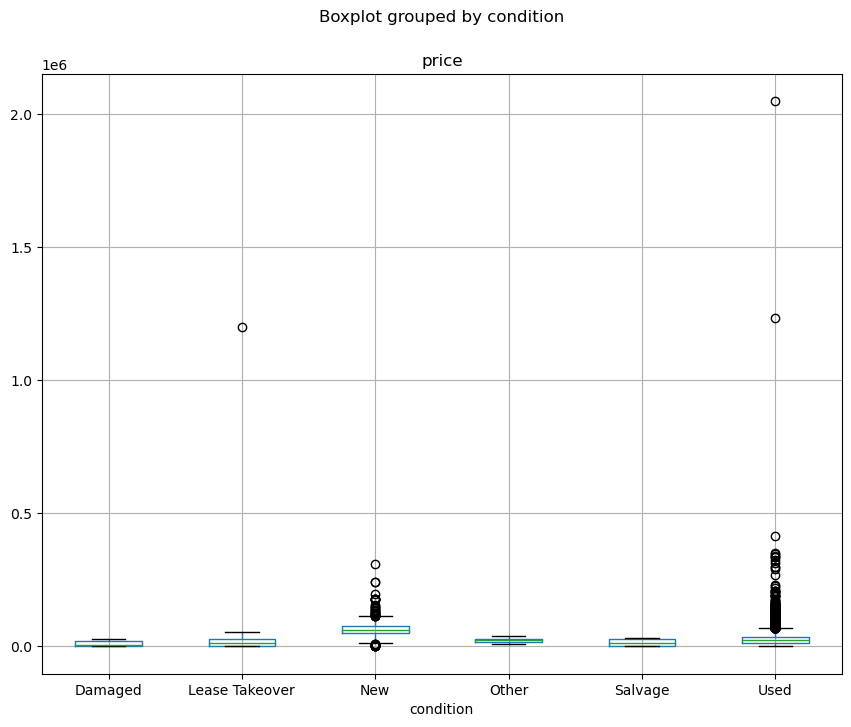

In [365]:
fig, ax = plt.subplots(figsize=(10,8))
dataset.boxplot(column=['price'], by='condition', ax=ax)

<AxesSubplot:title={'center':'mileage'}, xlabel='condition'>

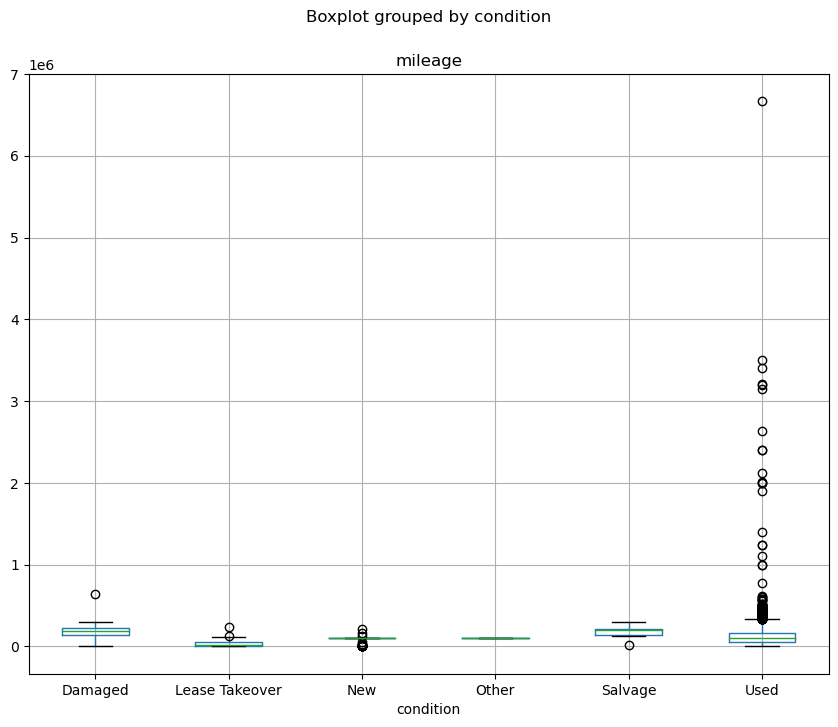

In [366]:
fig, ax = plt.subplots(figsize=(10,8))
dataset.boxplot(column=['mileage'], by='condition', ax=ax)


In [367]:
print(dataset.groupby('condition')['price'].max())
print(dataset.groupby('condition')['price'].min())

condition
Damaged             27495.0
Lease Takeover    1200000.0
New                308053.0
Other               41000.0
Salvage             31000.0
Used              2049900.0
Name: price, dtype: float64
condition
Damaged              1.0
Lease Takeover     200.0
New                 30.0
Other             8995.0
Salvage             20.0
Used                 1.0
Name: price, dtype: float64


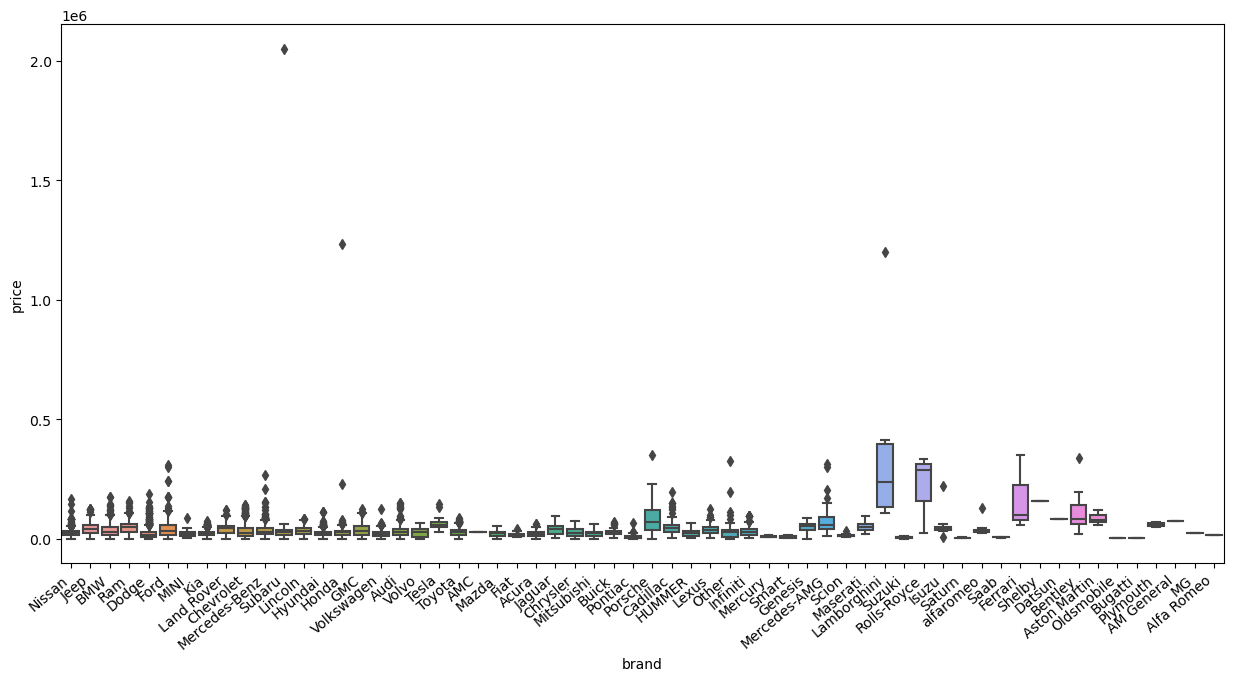

In [368]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='price',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Figure size 1200x400 with 0 Axes>

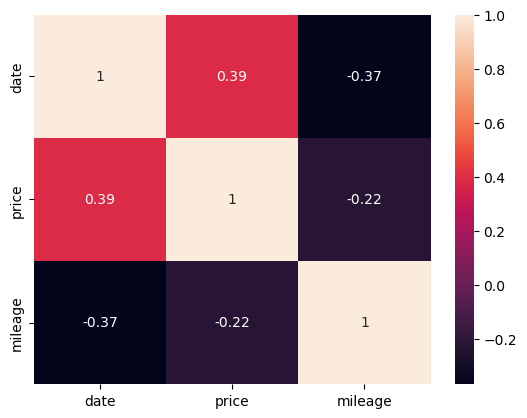

<Figure size 1200x400 with 0 Axes>

In [369]:
# correlation Heatmap of Numerical features
sns.heatmap(dataset.corr(),annot=True)
plt.figure(figsize = (12,4))

# Box Plot

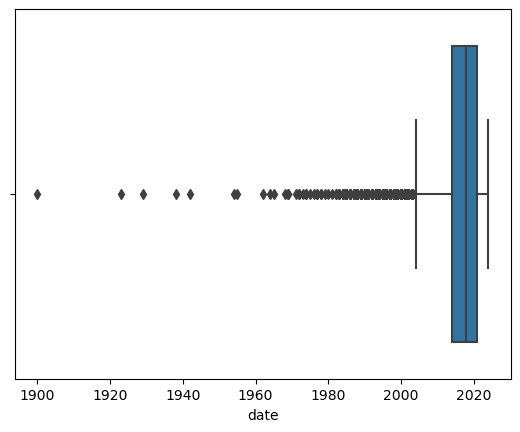

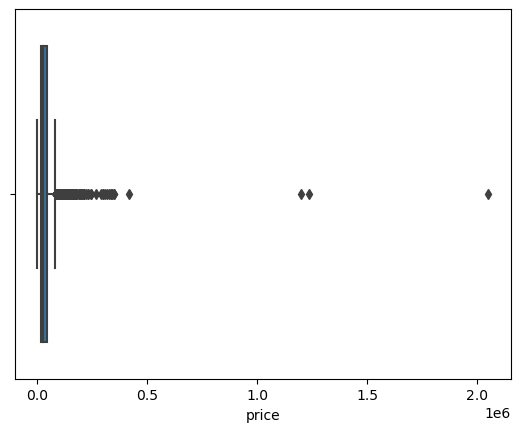

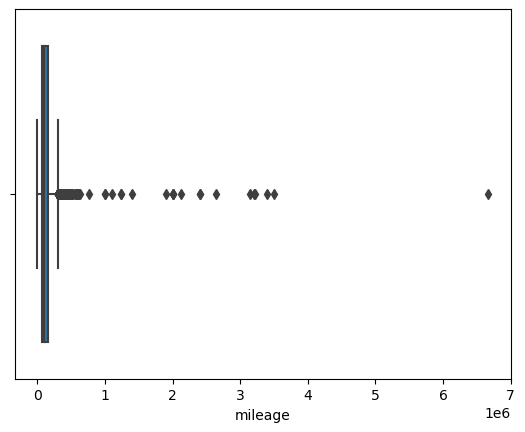

In [370]:
for features in numerical_features:
    sns.boxplot(dataset[features])
    plt.show()

# Handling Outliers

In [371]:
def outlier_removal(data,column):
    print(column)
    q1  = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3-q1
    lower_whisker= q1 - 1.5*IQR
    upper_whisker = q3 + 1.5*IQR
    #data = data[(data[column] > lower_whisker) & (data[column] < upper_whisker)]
    data[column] = np.where(data[column]<lower_whisker,lower_whisker,data[column])
    data[column] = np.where(data[column]>upper_whisker,upper_whisker,data[column])
    print(upper_whisker)
    print(lower_whisker)
    print(data.shape)
    
    return data

for i in numerical_features:
    new_df= outlier_removal(dataset,i)

new_df

date
2031.5
2003.5
(15475, 11)
price
82258.0
-23774.0
(15475, 11)
mileage
300260.25
-79929.75
(15475, 11)


,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
0,Nissan,Rogue,2018.0,25490.0,Other,Used,"SUV, Crossover",All-wheel drive (AWD),Other,Gasoline,102000.00
1,Jeep,Wrangler,2021.0,49495.0,Silver,Used,Convertible,4 x 4,Automatic,Gasoline,60463.00
2,BMW,X5,2016.0,29995.0,White,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,156274.00
3,Ram,1500,2023.0,51755.0,Red,New,Pickup Truck,Other,Automatic,Gasoline,102000.00
4,Dodge,Power Ram 2500,2004.0,22500.0,Other,Used,Pickup Truck,Other,Other,Other,300260.25
...,...,...,...,...,...,...,...,...,...,...,...
20311,Hyundai,Sonata,2019.0,27995.0,Blue,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,70125.00
20315,Subaru,Forester,2004.0,7500.0,Silver,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,215000.00
20316,Buick,Verano,2014.0,7000.0,Black,Used,Sedan,Other,Other,Other,195000.00
20317,Suzuki,Grand Vitara,2006.0,400.0,Other,Used,"SUV, Crossover",Other,Other,Other,200005.00


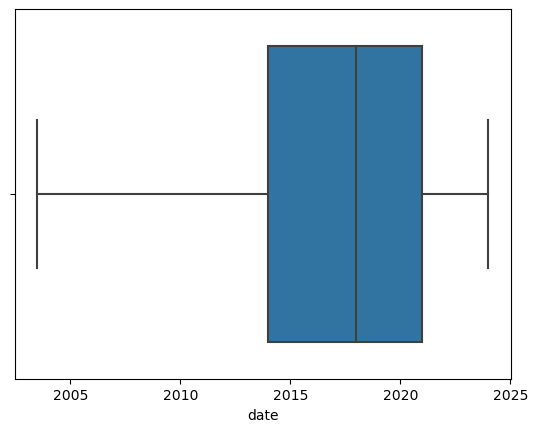

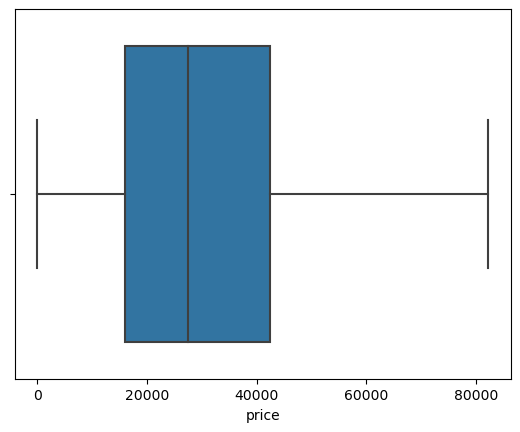

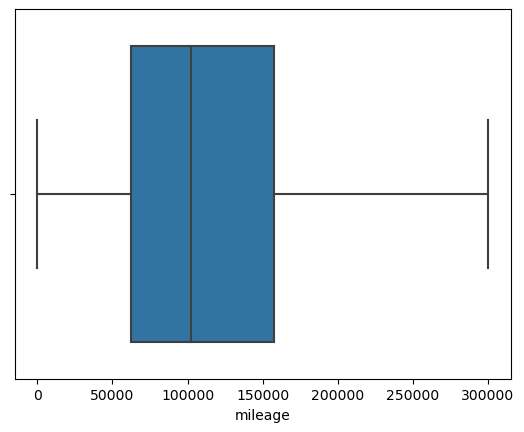

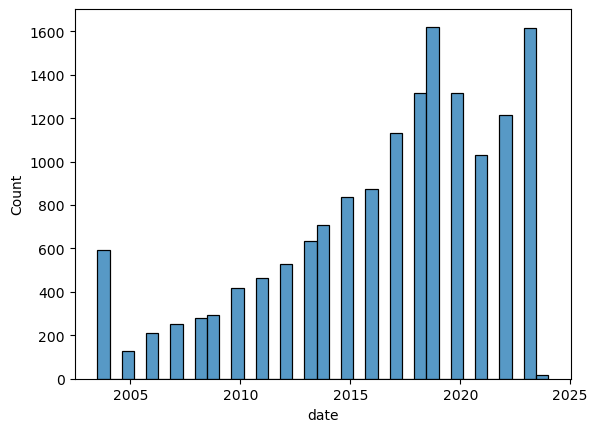

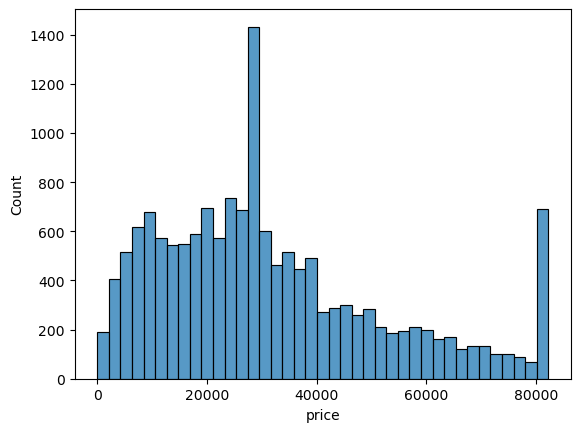

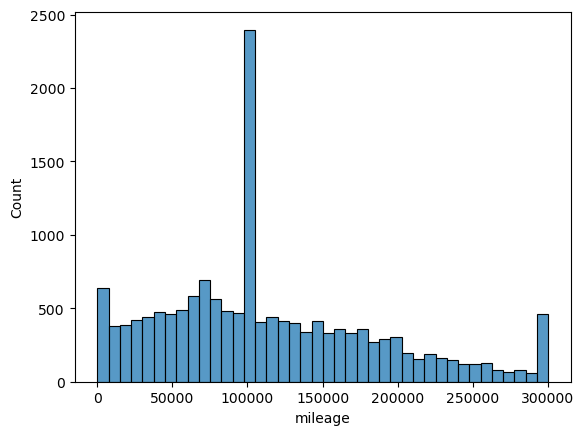

In [372]:
# Box plot after outlier 
for features in numerical_features:
    sns.boxplot(new_df[features])    
    plt.show()
for features in numerical_features:
    sns.histplot(new_df[features])    
    plt.show()

In [373]:
# converting the numerical features from objetct to Int
for i in numerical_features:
    new_df[i]=new_df[i].astype(int)


In [374]:
df = new_df.copy()
columns = ['brand','model','transmission','fueltype','mileage','date','price']
df = df[columns]
df.shape

(15475, 7)

In [383]:
df.to_csv('new_data_flask.csv')


# Train Test split

In [375]:
X = df.drop('price',axis = 1)
y = df['price']
X_train,X_test,y_train,y_test =train_test_split(X, y,test_size=0.2, random_state=1)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((12380, 6), (3095, 6), (12380,), (3095,))

# Feature Engineering and one hot encder

In [376]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

ohe=OneHotEncoder()
ohe.fit(X[['brand','model','transmission','fueltype']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['brand','model','transmission','fueltype']),
                                    remainder='passthrough')


# Linear Regression model

In [377]:
lr=LinearRegression()

pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
pred_train=pipe.predict(X_train)
y_pred=pipe.predict(X_test)
print("test Accuracy:",r2_score(y_test,y_pred))
print("Train Accuracy:",r2_score(y_train,pred_train))

test Accuracy: 0.6045728338457199
Train Accuracy: 0.615788941762812


# Random  Forest Regressor model

In [378]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
pipe=make_pipeline(column_trans,forest)
pipe.fit(X_train,y_train)
pred_train=pipe.predict(X_train)
y_pred=pipe.predict(X_test)
print("test Accuracy:",r2_score(y_test,y_pred))
print("Train Accuracy:",r2_score(y_train,pred_train))


test Accuracy: 0.8210474227512095
Train Accuracy: 0.9653450167676764


In [379]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

array([0.82720099, 0.7977463 , 0.80880027, 0.81113189, 0.83396506])

# Gradient Boosting Regressor

In [380]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

pipe=make_pipeline(column_trans,GBR)
pipe.fit(X_train,y_train)
pred_train=pipe.predict(X_train)
y_pred=pipe.predict(X_test)
print("test Accuracy:",r2_score(y_test,y_pred))
print("Train Accuracy:",r2_score(y_train,pred_train))

test Accuracy: 0.7399381438998769
Train Accuracy: 0.7570647120412315


In [381]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2').mean()

0.7424043076602255

# Saving the model

In [305]:
import pickle

pickle.dump(pipe,open('Gradient_Descent_Regressor.pkl','wb'))



# sample validation

In [384]:
result=pipe.predict(pd.DataFrame(columns=['brand','model','transmission','fueltype','mileage','date'],data=np.array(['Mazda','6','Automatic','Gasoline',58471,2021]).reshape(1,6)))


In [388]:
print("The prediction of car is ${}".format(round(float(result),2)))

The prediction of car is $39256.26
